In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
a = pd.read_csv('news_crawing/res/부산_장애인_교통_요약.csv', encoding='utf-8')
b = pd.read_csv('news_crawing/res/부산_장애인_이동권_요약.csv', encoding='utf-8')
c = pd.read_csv('news_crawing/res/부산_저상버스_요약.csv', encoding='utf-8')
d = pd.read_csv('news_crawing/res/저상버스_불편_요약.csv', encoding='utf-8')
total = pd.concat([b,c,d])
total.reset_index(drop=True)
total.to_csv('./res/기사요약병합.csv')

In [4]:
f = open('./res/기사요약병합.csv', encoding='utf-8')
lines = f.readlines()
len(lines)
# lines
f.close()

In [5]:
from konlpy.tag import Hannanum

In [6]:
hannanum = Hannanum()

In [7]:
dataset = []

for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]', '', lines[i])))
    
print(dataset[:5])  

[['기사요약'], ['문', '교통약자', '이동지원센터', '교통약자', '이동권', '보장', '휠체어', '탑승', '시설', '장착', '특수차량', '운행', '대중교통', '이용', '장애인', '노약자', '등', '편리', '안전', '이용', '수', '특별교통수단', '서비스', '제공한다운행지역은', '양평군', '관내', '운행', '원칙', '병원진료', '한해', '인접지역', '서울시', '경기', '구리시', '가평군', '남양주시', '하남시', '광주시', '이천시', '여주시', '강원', '홍천군', '횡성군', '원주시', '지역', '이용', '가능'], ['장애인', '이동편의', '지방자치단체', '의무적', '확보', '특별교통수단장애', '콜택시', '시군별', '보유비율', '편차', '것', '나타났다지난해', '기준', '전국', '개', '시기초', '특별교통수단', '평균', '도입율', '지난해', '기준', '전국', '특별교통수단', '운행대수', '대', '법정기준대수', '대', '의원', '지역', '저상버스', '도입', '확대', '시설', '개보수', '등', '장애', '이동권', '보장', '노력', '발전', '전체적', '때', '장애', '들', '안심', '이동', '수', '충분한', '환경여건', '것', '현실', '지적'], ['노컷뉴스', '모두', '관광', '나', '것', '주제', '유럽', '호주', '일본', '장애', '관광실태', '월', '보도한데', '이', '우리나라', '현주소', '집중', '취재해', '일', '차례', '보도', '있다세계', '노인', '장애', '들', '물리적', '심리적', '장벽', '배', '프리barrier', '장애', '유무', '모두', '이용', '가능', '환경', '유니버설', '디자인universal', '정책', '적극', '도입', '있다강병근', '건국대학교', '교수장애물', '생활환경', '연

In [8]:
dataset2 = []

for v in dataset :
    list_temp = []
    for i in range(len(v)) :
        if len(v[i]) > 1 :
            list_temp.append(v[i])
    
    #print(list_temp)
    dataset2.append(list_temp)

print(dataset2[:5])

[['기사요약'], ['교통약자', '이동지원센터', '교통약자', '이동권', '보장', '휠체어', '탑승', '시설', '장착', '특수차량', '운행', '대중교통', '이용', '장애인', '노약자', '편리', '안전', '이용', '특별교통수단', '서비스', '제공한다운행지역은', '양평군', '관내', '운행', '원칙', '병원진료', '한해', '인접지역', '서울시', '경기', '구리시', '가평군', '남양주시', '하남시', '광주시', '이천시', '여주시', '강원', '홍천군', '횡성군', '원주시', '지역', '이용', '가능'], ['장애인', '이동편의', '지방자치단체', '의무적', '확보', '특별교통수단장애', '콜택시', '시군별', '보유비율', '편차', '나타났다지난해', '기준', '전국', '시기초', '특별교통수단', '평균', '도입율', '지난해', '기준', '전국', '특별교통수단', '운행대수', '법정기준대수', '의원', '지역', '저상버스', '도입', '확대', '시설', '개보수', '장애', '이동권', '보장', '노력', '발전', '전체적', '장애', '안심', '이동', '충분한', '환경여건', '현실', '지적'], ['노컷뉴스', '모두', '관광', '주제', '유럽', '호주', '일본', '장애', '관광실태', '보도한데', '우리나라', '현주소', '집중', '취재해', '차례', '보도', '있다세계', '노인', '장애', '물리적', '심리적', '장벽', '프리barrier', '장애', '유무', '모두', '이용', '가능', '환경', '유니버설', '디자인universal', '정책', '적극', '도입', '있다강병근', '건국대학교', '교수장애물', '생활환경', '연구소장강병근', '건국대', '교수', '서울특별시', '대전광역시', '무장애', '도시', '건설', '서울', '경우', '개선', '건물', '시설', '체감', 

In [9]:
from apyori import apriori

result = (list(apriori(dataset2, min_suppoer=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x : len(x))
df = df[(df['length'] == 2) & (df['support'] > 0.01)].sort_values(by='support', ascending=False)
df.head()

,items,support,ordered_statistics,length
55,"(장애, 이동권)",0.263784,"[((), (이동권, 장애), 0.2637837837837838, 1.0), ((이...",2
64,"(장애, 장애인)",0.203243,"[((), (장애, 장애인), 0.20324324324324325, 1.0), ((...",2
65,"(장애, 저상버스)",0.195676,"[((), (장애, 저상버스), 0.19567567567567568, 1.0), (...",2
67,"(장애, 휠체어)",0.183243,"[((), (장애, 휠체어), 0.18324324324324323, 1.0), ((...",2
66,"(장애, 지하철)",0.176757,"[((), (장애, 지하철), 0.17675675675675676, 1.0), ((...",2


In [10]:
G = nx.Graph()
ar = (df['items'])
G.add_edges_from(ar)

In [11]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [82]:
pos = nx.spring_layout(G)

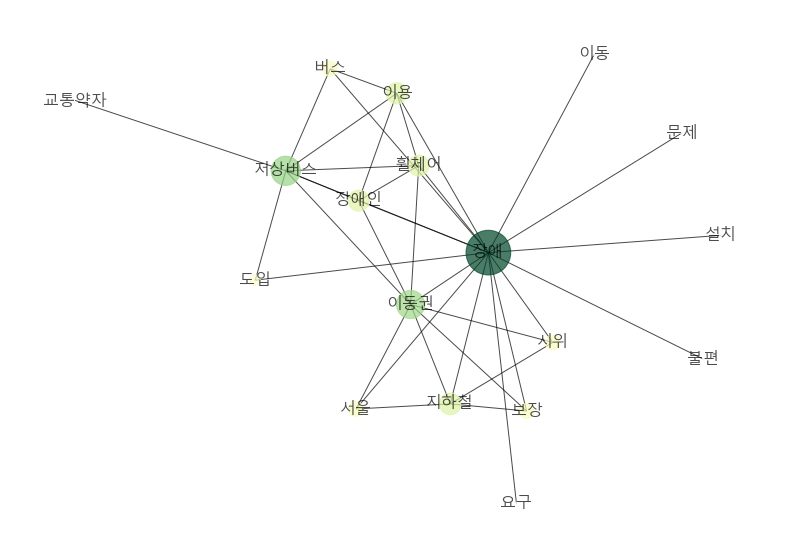

In [83]:
plt.figure(figsize=(14,10))
plt.axis('off')

nx.draw_networkx(G, font_family='Malgun Gothic', font_size=16,
                    pos=pos, node_color=list(pr.values()), node_size=nsize,
                    alpha=0.7, cmap=plt.cm.YlGn)